In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
coun = ['India', 'Colombia', 'Venezuela', 'EEUU']
pop = [100000, 50000, 45000,70000]

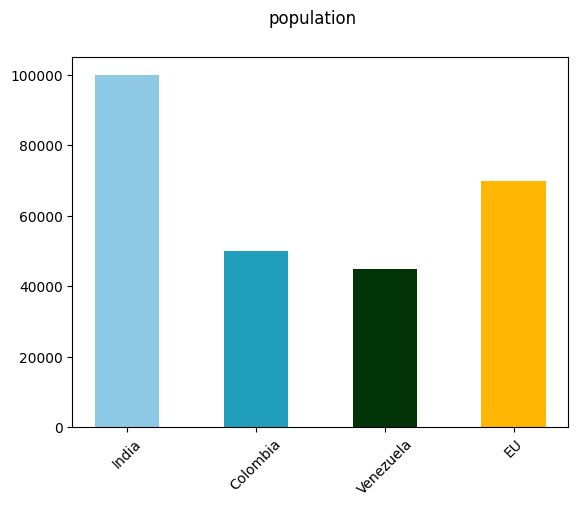

In [114]:
plt.bar(coun,pop, width=0.5, color =['#8ecae6','#219ebc','#023407','#ffb703'])
## when we have the ticket from a file and we need to rewrite the name of these tickets
## we only nee to write tehe command "plt.xticks(np.arange(# of tickets), "Rewrite the ticktes")"
plt.xticks(np.arange(4),('India', 'Colombia', 'Venezuela', 'EU'), rotation= 45)
plt.suptitle("population")
plt.show()

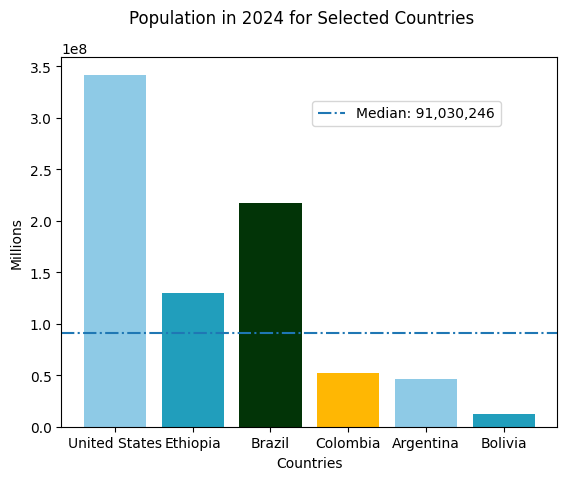

In [29]:
population = pd.read_csv('C:/Users/Lenovo/Programacion/Base de datos/countries-table.csv')
population.set_index('country', inplace=True)
countries = [ 'United States','Ethiopia','Brazil','Colombia', 'Argentina', 'Bolivia']
df = population.loc[countries,['pop2024']]
#df['pop2024'] = df['pop2024'].map('{:,.0f}'.format)
df['pop2024'] = df['pop2024'].astype(int)
#df.sort_values(['pop2024'])
#fig , axes1 , axes2 = plt.subplot()
plt.bar(df.index, df['pop2024'], color =['#8ecae6','#219ebc','#023407','#ffb703'])
plt.axhline(np.median(df),linestyle = '-.', label=f'Median: {np.median(df):,.0f}')
plt.suptitle('Population in 2024 for Selected Countries')
plt.xlabel('Countries')
plt.ylabel('Millions')
plt.legend(bbox_to_anchor=(0.9, 0.9))


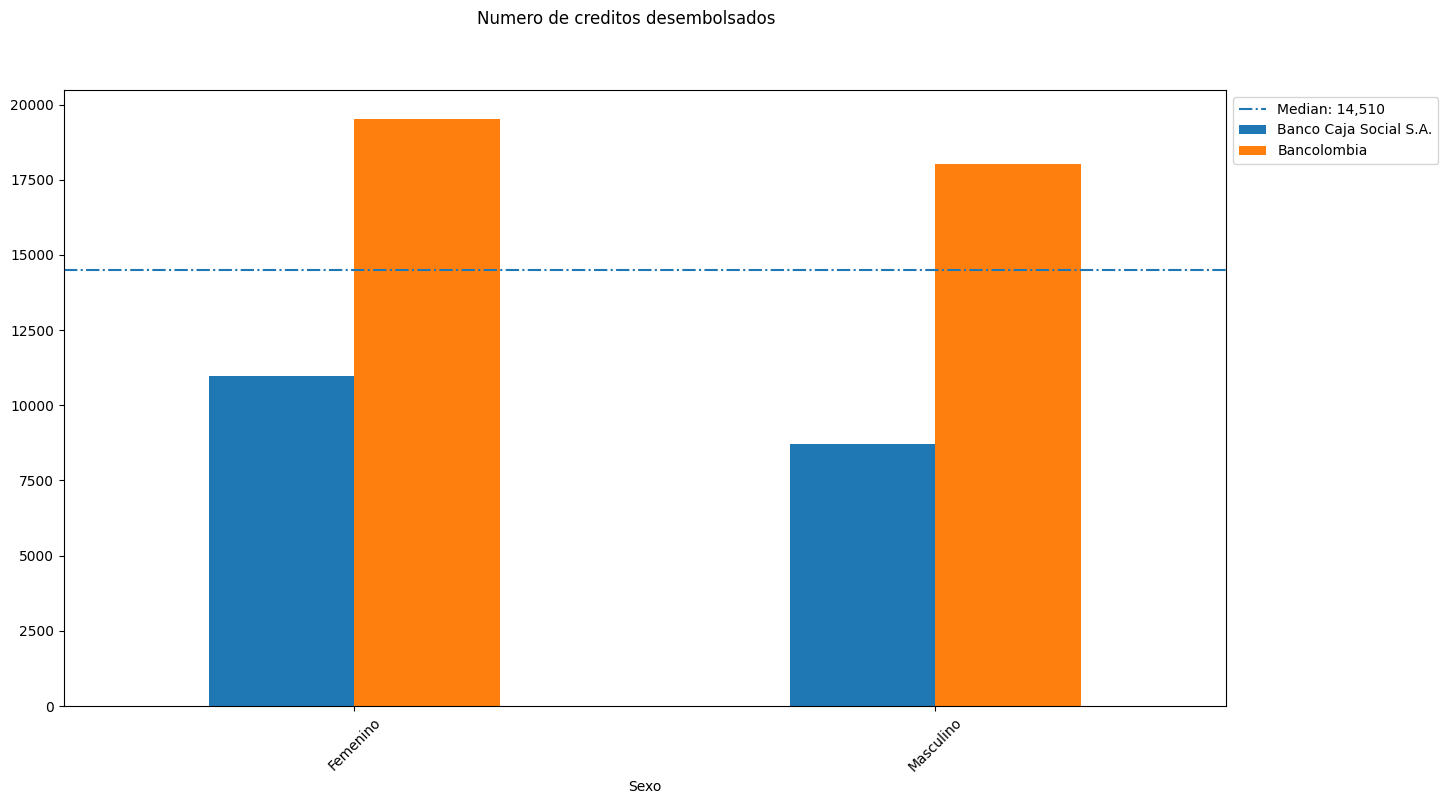

In [115]:
df = pd.read_csv('C:/Users/Lenovo/Programacion/Base de datos/Tasas_de_inter_s_activas_por_tipo_de_cr_dito_20240219.csv')
df.set_index("Sexo", inplace=True)
df.sort_index(inplace=True)
bancolombia = df["Nombre_Entidad"] == "Bancolombia"
davivienda = df["Nombre_Entidad"] == "Banco Caja Social S.A."
creditos_desembolsados = df['Numero_de_creditos_desembolsados']
filtered_df = df[(bancolombia| davivienda)][['Nombre_Entidad', 'Numero_de_creditos_desembolsados']]
general = filtered_df.groupby(['Sexo', 'Nombre_Entidad'])['Numero_de_creditos_desembolsados'].sum().unstack()
general.plot(kind= 'bar', figsize= (15,8))
plt.xticks(rotation= 45)
plt.suptitle("Numero de creditos desembolsados")
plt.legend(title='Entidad Bancaria')
plt.axhline(np.median(general),linestyle = '-.', label=f'Median: {np.median(general):,.0f}')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Text(0.5, 0.98, 'Desembolso creditos por genero')

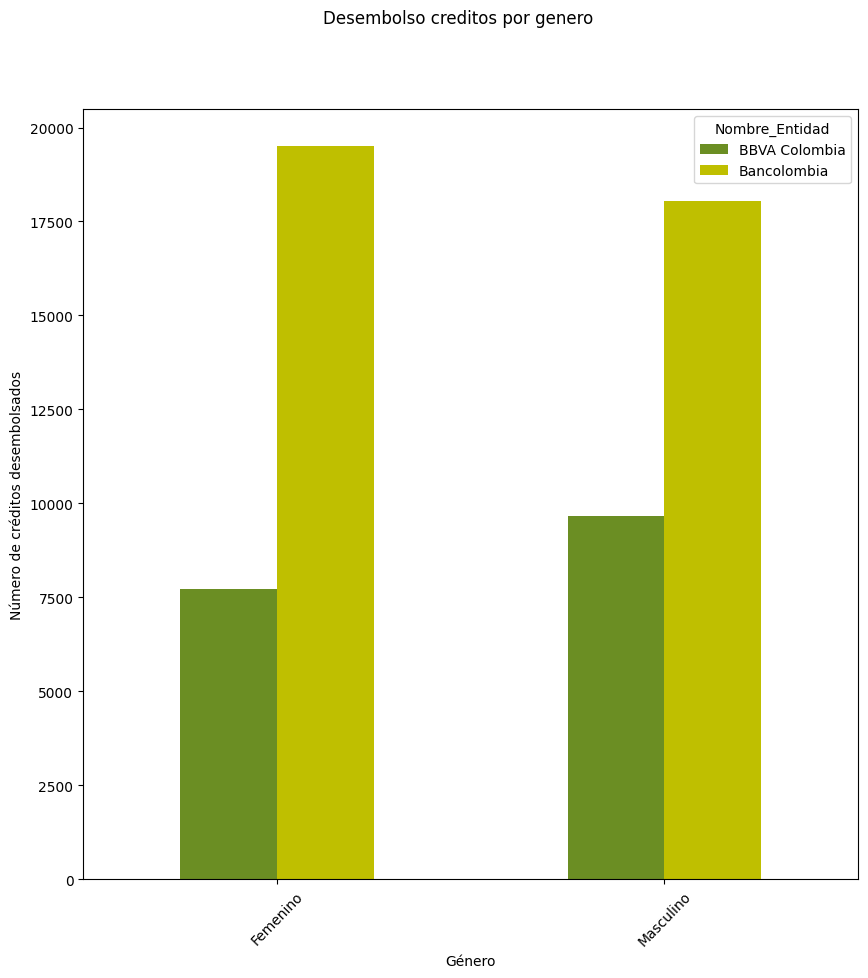

In [146]:
ddf = pd.read_csv('C:/Users/Lenovo/Programacion/Base de datos/Tasas_de_inter_s_activas_por_tipo_de_cr_dito_20240219.csv')
ddf.set_index("Sexo", inplace=True)
ddf.sort_index(inplace=True)
dg = (ddf["Nombre_Entidad"] == "Bancolombia")| (ddf["Nombre_Entidad"]== "BBVA Colombia")
filtro = ddf[dg][['Nombre_Entidad', 'Numero_de_creditos_desembolsados']]
final = filtro.groupby(["Sexo", "Nombre_Entidad"])['Numero_de_creditos_desembolsados'].sum().unstack()
final.plot(kind="bar", figsize = (10,10), color=["olivedrab", "y"])
plt.xticks(rotation = 46)
plt.xlabel("Género")
plt.ylabel("Número de créditos desembolsados")
plt.suptitle("Desembolso creditos por genero")

In [55]:
df = pd.read_csv('C:/Users/Lenovo/Programacion/Base de datos/CarPricesPrediction.csv')
df.drop("Unnamed: 0", axis =1, inplace=True)
toyota = (df["Model"] == "Silverado") & (df["Make"] == "Toyota")
ford = (df["Model"] == "Civic") & (df["Make"] == "Ford")
chrevrolet= (df["Model"] == "F-150") & (df["Make"] == "Chevrolet")
d = df[ford | chrevrolet | toyota]
new_table = d.pivot_table(index="Model", columns="Year", values="Price").astype(int)
new_table

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Model,,,,,,,,,,,,,
Civic,28811,28004,25215,25794,24275,22267,23810,22212,20855,19827,17600,18552,17996
F-150,27385,27202,26925,27436,25397,22643,23782,21688,19492,21493,16682,17511,17257
Silverado,27998,25257,26828,24444,25400,21902,19519,21401,17878,17469,17280,18880,14838


In [82]:
civic = new_table.loc["Civic"]
F150= new_table.loc["F-150"]
silver = new_table.loc["Silverado"]
civic_mean = np.mean(civic)
F150_mean = np.mean(F150)
silver_mean = np.mean(silver)


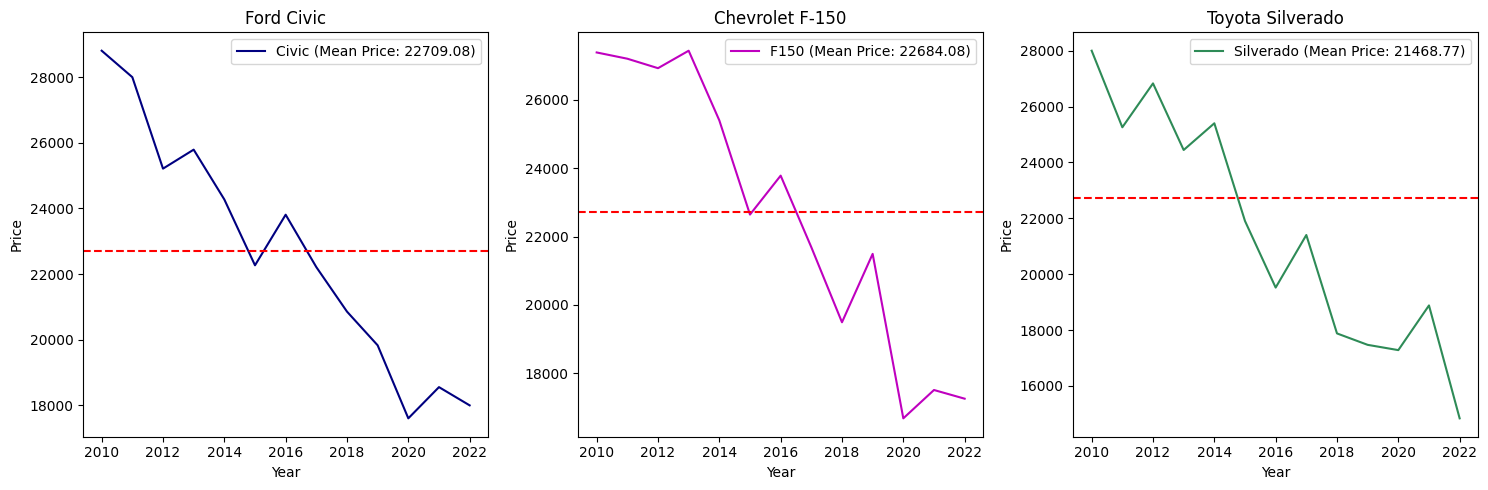

In [94]:
fig, (axes1, axes2, axes3) = plt.subplots(1,3, figsize =(15,5))
axes1.plot(civic, color="navy")
axes1.set_ylabel("Price")
axes1.set_xlabel("Year")
axes1.set_title("Ford Civic")
axes1.axhline(civic_mean,color="red", linestyle="--", label="Mean Price")
axes1.legend()
axes2.plot(F150, color = "m")
axes2.set_ylabel("Price")
axes2.set_xlabel("Year")
axes2.set_title("Chevrolet F-150")
axes2.axhline(civic_mean,color="red", linestyle="--", label="Mean Price")
axes2.legend()
axes3.plot(silver, color ="seagreen")
axes3.set_ylabel("Price")
axes3.set_xlabel("Year")
axes3.axhline(civic_mean,color="red", linestyle="--", label="Mean Price")
axes3.set_title("Toyota Silverado")
axes3.legend()
axes1.legend(["Civic (Mean Price: {:.2f})".format(civic_mean)], loc="best")
axes2.legend(["F150 (Mean Price: {:.2f})".format(F150_mean)], loc="best")
axes3.legend(["Silverado (Mean Price: {:.2f})".format(silver_mean)], loc="best")
plt.tight_layout()